In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

# DATA PREPROCESSING

### Loading data

In [4]:
df = pd.read_csv("house_prices.csv")
pd.set_option('display.max_columns', None)
df

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN


### Exploring Data

In [6]:
print(df.columns)

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')


In [7]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df = df.apply(lambda col: col.map(lambda x: x.lower() if isinstance(x, str) else x))


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              187531 non-null  int64  
 1   title              187531 non-null  object 
 2   description        184508 non-null  object 
 3   amount(in rupees)  187531 non-null  object 
 4   price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   carpet area        106858 non-null  object 
 7   status             186916 non-null  object 
 8   floor              180454 non-null  object 
 9   transaction        187448 non-null  object 
 10  furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  society            77853 non-null   object 
 14  bathroom           186703 non-null  object 
 15  balcony            138596 non-null  object 
 16  ca

In [11]:
df.describe()

,index,price (in rupees),dimensions,plot area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [12]:
df.isna().sum()

index                     0
title                     0
description            3023
amount(in rupees)         0
price (in rupees)     17665
location                  0
carpet area           80673
status                  615
floor                  7077
transaction              83
furnishing             2897
facing                70233
overlooking           81436
society              109678
bathroom                828
balcony               48935
car parking          103357
ownership             65517
super area           107685
dimensions           187531
plot area            187531
dtype: int64

In [13]:
df.duplicated().sum()

0

### initial data analysis 

In [15]:
sample_df = df.sample(n=20000, replace=False , random_state=42)
sample_df.shape

(20000, 21)

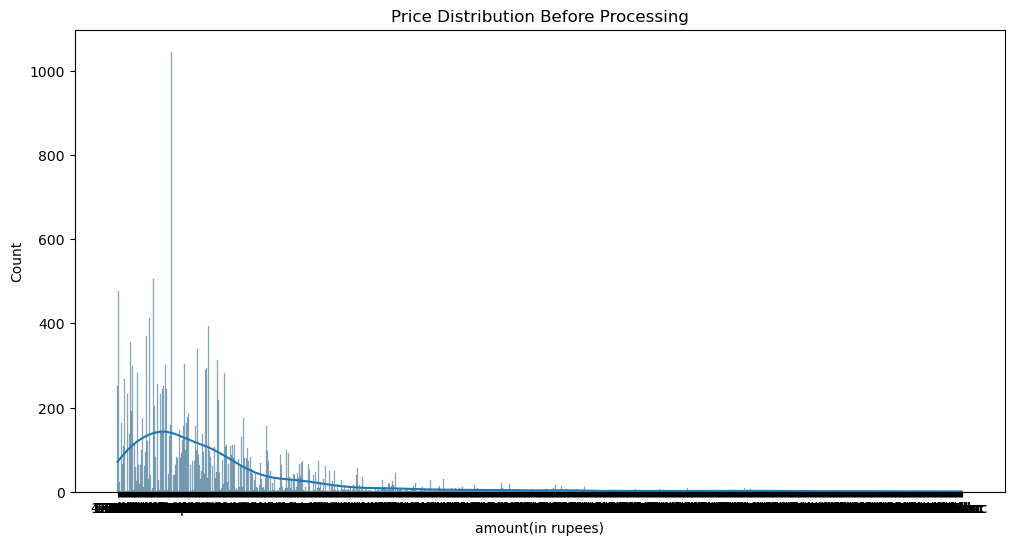

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(sample_df['amount(in rupees)'], bins=50, kde=True)
plt.title("Price Distribution Before Processing")
plt.show()

In [17]:
df['location'].value_counts().head(50)

new-delhi        27599
bangalore        24030
kolkata          22380
gurgaon          20070
ahmedabad        12750
hyderabad        12300
chennai          10500
jaipur            8490
greater-noida     4710
faridabad         3840
vadodara          2388
surat             2370
pune              2225
thane             1933
mumbai            1860
visakhapatnam     1800
mohali            1710
zirakpur          1530
chandigarh        1440
noida             1281
goa               1200
ranchi            1080
bhiwadi           1050
kochi             1050
dehradun           990
ghaziabad          931
lucknow            896
patna              780
kanpur             780
guwahati           750
sonipat            750
coimbatore         720
navi-mumbai        718
nagpur             714
jamshedpur         630
kalyan             600
vijayawada         570
raipur             510
palghar            510
bhubaneswar        456
agra               450
mangalore          450
aurangabad         450
badlapur   

data cleaning

1.location (taking top 25 locations)

In [21]:
top_locations =  df["location"].value_counts().nlargest(20).index
top_locations

Index(['new-delhi', 'bangalore', 'kolkata', 'gurgaon', 'ahmedabad',
       'hyderabad', 'chennai', 'jaipur', 'greater-noida', 'faridabad',
       'vadodara', 'surat', 'pune', 'thane', 'mumbai', 'visakhapatnam',
       'mohali', 'zirakpur', 'chandigarh', 'noida'],
      dtype='object')

In [22]:
df["location"] = df["location"].apply(lambda x: x if x in top_locations else "other")

In [23]:
df["location"].unique()

array(['thane', 'other', 'mumbai', 'ahmedabad', 'bangalore', 'chennai',
       'gurgaon', 'hyderabad', 'jaipur', 'kolkata', 'new-delhi', 'noida',
       'pune', 'chandigarh', 'faridabad', 'greater-noida', 'mohali',
       'surat', 'vadodara', 'visakhapatnam', 'zirakpur'], dtype=object)

In [24]:
df["location"].value_counts()

new-delhi        27599
bangalore        24030
kolkata          22380
other            22325
gurgaon          20070
ahmedabad        12750
hyderabad        12300
chennai          10500
jaipur            8490
greater-noida     4710
faridabad         3840
vadodara          2388
surat             2370
pune              2225
thane             1933
mumbai            1860
visakhapatnam     1800
mohali            1710
zirakpur          1530
chandigarh        1440
noida             1281
Name: location, dtype: int64

In [25]:
df.shape

(187531, 21)

2.title(convert column name to bhk and strip the integer values only)

In [27]:
unique_titles = df["title"].unique().tolist()
print(unique_titles)

['1 bhk ready to occupy flat for sale in srushti siddhi mangal murti complex bhiwandi', '2 bhk ready to occupy flat for sale in dosti vihar pokhran road', '2 bhk ready to occupy flat for sale in sunrise by kalpataru kolshet road', '1 bhk ready to occupy flat for sale kasheli', '2 bhk ready to occupy flat for sale in tenx habitat raymond realty pokhran road', '1 bhk ready to occupy flat for sale in virat aangan titwala', '1 bhk ready to occupy flat for sale mumbra', '1 bhk ready to occupy flat for sale kalwa', '3 bhk ready to occupy flat for sale in pride palms kolshet', '3 bhk ready to occupy flat for sale in cosmos lounge manpada thane west', '2 bhk ready to occupy flat for sale in regency heights kolshet road', '4 bhk ready to occupy flat for sale hiranandani estate', '1 bhk ready to occupy flat for sale rabodi', '2 bhk ready to occupy flat for sale in puraniks tokyo bay kasarvadavali', '1 bhk ready to occupy flat for sale in green woods shilphata', '1 bhk ready to occupy flat for sa

In [28]:
df2 = df.copy()

In [29]:
df2.head(2)

,index,title,description,amount(in rupees),price (in rupees),location,carpet area,status,floor,transaction,furnishing,facing,overlooking,society,bathroom,balcony,car parking,ownership,super area,dimensions,plot area
0,0,1 bhk ready to occupy flat for sale in srushti...,"bhiwandi, thane has an attractive 1 bhk flat f...",42 lac,6000.0,thane,500 sqft,ready to move,10 out of 11,resale,unfurnished,NaN,NaN,srushti siddhi mangal murti complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 bhk ready to occupy flat for sale in dosti v...,one can find this stunning 2 bhk flat for sale...,98 lac,13799.0,thane,473 sqft,ready to move,3 out of 22,resale,semi-furnished,east,garden/park,dosti vihar,2,NaN,1 open,freehold,NaN,NaN,NaN


In [30]:
df2.rename(columns={'title':'bhk'},inplace=True)

In [31]:
df2['bhk']= df2['bhk'].str.extract(r'(\d+)\s*[a-zA-Z]+')

In [32]:
df2["bhk"].unique()

array(['1', '2', '3', '4', '5', nan, '6', '8', '7', '10', '9', '14',
       '360', '221005'], dtype=object)

In [33]:
df2["bhk"].value_counts()

3         80852
2         75514
4         16600
1         12286
5          1183
6            98
10           43
7            22
8            17
9             7
14            1
360           1
221005        1
Name: bhk, dtype: int64

In [34]:
df2["bhk"].isna().sum()

906

In [35]:
df2.isna().sum()

index                     0
bhk                     906
description            3023
amount(in rupees)         0
price (in rupees)     17665
location                  0
carpet area           80673
status                  615
floor                  7077
transaction              83
furnishing             2897
facing                70233
overlooking           81436
society              109678
bathroom                828
balcony               48935
car parking          103357
ownership             65517
super area           107685
dimensions           187531
plot area            187531
dtype: int64

In [36]:
missing_percentage = (df2.isna().sum()/len(df2))*100
print(missing_percentage.sort_values(ascending =False))

plot area            100.000000
dimensions           100.000000
society               58.485264
super area            57.422506
car parking           55.114621
overlooking           43.425354
carpet area           43.018488
facing                37.451408
ownership             34.936624
balcony               26.094352
price (in rupees)      9.419776
floor                  3.773776
description            1.612000
furnishing             1.544811
bhk                    0.483120
bathroom               0.441527
status                 0.327946
transaction            0.044259
location               0.000000
amount(in rupees)      0.000000
index                  0.000000
dtype: float64


In [37]:
numeric_summary = df2.describe(exclude='object').round(2)
numeric_summary

,index,price (in rupees),dimensions,plot area
count,187531.00,169866.00,0.0,0.0
mean,93765.00,7583.77,NaN,NaN
std,54135.68,27241.71,NaN,NaN
min,0.00,0.00,NaN,NaN
25%,46882.50,4297.00,NaN,NaN
50%,93765.00,6034.00,NaN,NaN
75%,140647.50,9450.00,NaN,NaN
max,187530.00,6700000.00,NaN,NaN


In [38]:
columns_to_drop = ['index','floor','status','facing','overlooking','society','car parking','description','dimensions','plot area','super area']

df3 = df2.drop(columns = columns_to_drop)

df3.head()

,bhk,amount(in rupees),price (in rupees),location,carpet area,transaction,furnishing,bathroom,balcony,ownership
0,1,42 lac,6000.0,thane,500 sqft,resale,unfurnished,1,2,NaN
1,2,98 lac,13799.0,thane,473 sqft,resale,semi-furnished,2,NaN,freehold
2,2,1.40 cr,17500.0,thane,779 sqft,resale,unfurnished,2,NaN,freehold
3,1,25 lac,NaN,thane,530 sqft,resale,unfurnished,1,1,NaN
4,2,1.60 cr,18824.0,thane,635 sqft,resale,unfurnished,2,NaN,co-operative society


In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   bhk                186625 non-null  object 
 1   amount(in rupees)  187531 non-null  object 
 2   price (in rupees)  169866 non-null  float64
 3   location           187531 non-null  object 
 4   carpet area        106858 non-null  object 
 5   transaction        187448 non-null  object 
 6   furnishing         184634 non-null  object 
 7   bathroom           186703 non-null  object 
 8   balcony            138596 non-null  object 
 9   ownership          122014 non-null  object 
dtypes: float64(1), object(9)
memory usage: 14.3+ MB


In [40]:
df3.isna().sum()

bhk                    906
amount(in rupees)        0
price (in rupees)    17665
location                 0
carpet area          80673
transaction             83
furnishing            2897
bathroom               828
balcony              48935
ownership            65517
dtype: int64

In [41]:
amount_list = df3["amount(in rupees)"].unique().tolist()
print(amount_list)

['42 lac ', '98 lac ', '1.40 cr ', '25 lac ', '1.60 cr ', '45 lac ', '16.5 lac ', '60 lac ', '1.36 cr ', '1.35 cr ', '4.25 cr ', '75 lac ', '90 lac ', '37 lac ', '35 lac ', '54 lac ', '1.65 cr ', '85 lac ', '1.28 cr ', 'call for price', '24 lac ', '61 lac ', '1.75 cr ', '47 lac ', '3.20 cr ', '1.98 cr ', '83 lac ', '1.42 cr ', '26 lac ', '70 lac ', '1.18 cr ', '20 lac ', '1.10 cr ', '1.05 cr ', '78 lac ', '1.55 cr ', '12 lac ', '32 lac ', '23 lac ', '1 cr ', '50 lac ', '30 lac ', '1.20 cr ', '51 lac ', '1.90 cr ', '40 lac ', '43 lac ', '2.60 cr ', '2.65 cr ', '53 lac ', '2.40 cr ', '3.10 cr ', '2 cr ', '22 lac ', '79 lac ', '48 lac ', '75.2 lac ', '1.32 cr ', '28 lac ', '77 lac ', '1.19 cr ', '68 lac ', '4 cr ', '68.6 lac ', '99 lac ', '44.3 lac ', '55 lac ', '33 lac ', '95 lac ', '2.10 cr ', '15 lac ', '97 lac ', '27 lac ', '41 lac ', '42.9 lac ', '2.36 cr ', '29 lac ', '27.5 lac ', '3.45 cr ', '56 lac ', '45.5 lac ', '1.70 cr ', '4.90 cr ', '58 lac ', '21 lac ', '2.75 cr ', '2.50 cr 

In [42]:
def convert_amount(data_values):
 try:
   if "lac" in data_values:
      data_values = data_values.replace('lac', '').strip()
      return float(data_values)*100000 # to lakh 
   elif "cr" in data_values:
      data_values = data_values.replace('cr', '').strip()
      return float(data_values)*10000000
   else:
      return float(data_values)
 except ValueError:
   return None

In [43]:
df3["amount(in rupees)"] = df3["amount(in rupees)"].apply(convert_amount)

In [44]:
df3.head()

,bhk,amount(in rupees),price (in rupees),location,carpet area,transaction,furnishing,bathroom,balcony,ownership
0,1,4200000.0,6000.0,thane,500 sqft,resale,unfurnished,1,2,NaN
1,2,9800000.0,13799.0,thane,473 sqft,resale,semi-furnished,2,NaN,freehold
2,2,14000000.0,17500.0,thane,779 sqft,resale,unfurnished,2,NaN,freehold
3,1,2500000.0,NaN,thane,530 sqft,resale,unfurnished,1,1,NaN
4,2,16000000.0,18824.0,thane,635 sqft,resale,unfurnished,2,NaN,co-operative society


In [45]:
df3.rename(columns={'amount(in rupees)':'total_amount'},inplace=True)

In [46]:
df3.head()

,bhk,total_amount,price (in rupees),location,carpet area,transaction,furnishing,bathroom,balcony,ownership
0,1,4200000.0,6000.0,thane,500 sqft,resale,unfurnished,1,2,NaN
1,2,9800000.0,13799.0,thane,473 sqft,resale,semi-furnished,2,NaN,freehold
2,2,14000000.0,17500.0,thane,779 sqft,resale,unfurnished,2,NaN,freehold
3,1,2500000.0,NaN,thane,530 sqft,resale,unfurnished,1,1,NaN
4,2,16000000.0,18824.0,thane,635 sqft,resale,unfurnished,2,NaN,co-operative society


In [47]:
df3['bhk']=pd.to_numeric(df3['bhk'])

In [48]:
df3.drop(columns='price (in rupees)',inplace=True)

In [49]:
df4 = df3.copy()

df4

In [51]:
carpetarea_unique = df4['carpet area'].unique().tolist()
carpetarea_unique

['500 sqft',
 '473 sqft',
 '779 sqft',
 '530 sqft',
 '635 sqft',
 nan,
 '550 sqft',
 '900 sqft',
 '950 sqft',
 '1820 sqft',
 '675 sqft',
 '647 sqft',
 '600 sqft',
 '430 sqft',
 '665 sqft',
 '557 sqft',
 '870 sqft',
 '288 sqft',
 '925 sqft',
 '434 sqft',
 '1350 sqft',
 '850 sqft',
 '467 sqft',
 '849 sqft',
 '440 sqft',
 '639 sqft',
 '923 sqft',
 '620 sqft',
 '367 sqft',
 '880 sqft',
 '380 sqft',
 '375 sqft',
 '636 sqft',
 '661 sqft',
 '686 sqft',
 '504 sqft',
 '799 sqft',
 '320 sqft',
 '650 sqft',
 '586 sqft',
 '1200 sqft',
 '741 sqft',
 '590 sqft',
 '960 sqft',
 '1168 sqft',
 '920 sqft',
 '400 sqft',
 '460 sqft',
 '404 sqft',
 '624 sqft',
 '510 sqft',
 '450 sqft',
 '420 sqft',
 '744 sqft',
 '740 sqft',
 '479 sqft',
 '445 sqft',
 '1600 sqft',
 '625 sqft',
 '739 sqft',
 '410 sqft',
 '775 sqft',
 '759 sqft',
 '1041 sqft',
 '735 sqft',
 '370 sqft',
 '770 sqft',
 '688 sqft',
 '640 sqft',
 '680 sqft',
 '1073 sqft',
 '1356 sqft',
 '483 sqft',
 '453 sqft',
 '750 sqft',
 '800 sqft',
 '760 sqft'

In [52]:
def convert_sqft(sqft_values):
    try:
        if isinstance(sqft_values, str):
            sqft_values = sqft_values.strip().lower()  

            if 'sqft' in sqft_values:
                sqft_values = sqft_values.replace('sqft', '').strip()  
                return float(sqft_values)
            elif 'sqyrd' in sqft_values:
                sqft_values = sqft_values.replace('sqyrd', '').strip()
                return float(sqft_values) * 9 
            elif 'sqm' in sqft_values:
                sqft_values = sqft_values.replace('sqm', '').strip()
                return float(sqft_values) * 0.092903  
            else:
                return None  
        elif isinstance(sqft_values, (int, float)):
            return float(sqft_values)  
        else:
            return None  
    except ValueError:
        return None  


In [53]:
df4["carpet area"] = df4["carpet area"].apply(convert_sqft)

In [54]:
df4.rename(columns={"carpet area":"carpet_area_sqft"},inplace=True)

In [55]:
df4['bhk'].unique().tolist()

[1.0, 2.0, 3.0, 4.0, 5.0, nan, 6.0, 8.0, 7.0, 10.0, 9.0, 14.0, 360.0, 221005.0]

In [56]:
df4.dropna(subset=["bhk"],axis=0,inplace=True)

In [57]:
df4['bhk'] = df4['bhk'].astype(int)

In [58]:
# df4.isna().sum()

In [59]:
# df4.head(5)

In [60]:
df5 = df4.copy()

In [61]:
df5.dropna(subset=['carpet_area_sqft'],axis=0,inplace=True)

In [62]:
df5.isna().sum()

bhk                     0
total_amount         4758
location                0
carpet_area_sqft        0
transaction            78
furnishing             40
bathroom               25
balcony              7231
ownership           18836
dtype: int64

In [63]:
df5.shape

(106135, 9)

In [64]:
df5['location'].value_counts().head(50)

new-delhi        22635
gurgaon          12323
kolkata          11668
other            11571
bangalore         7598
hyderabad         7338
ahmedabad         6513
chennai           5135
jaipur            4049
faridabad         3074
greater-noida     2776
mumbai            1465
vadodara          1395
pune              1381
thane             1294
visakhapatnam     1192
mohali            1137
zirakpur          1090
surat              924
chandigarh         893
noida              684
Name: location, dtype: int64

In [65]:
loc_list = df5['location'].unique().tolist()
loc_list

['thane',
 'other',
 'mumbai',
 'ahmedabad',
 'bangalore',
 'chennai',
 'gurgaon',
 'hyderabad',
 'jaipur',
 'kolkata',
 'new-delhi',
 'noida',
 'pune',
 'chandigarh',
 'faridabad',
 'greater-noida',
 'mohali',
 'surat',
 'vadodara',
 'visakhapatnam',
 'zirakpur']

In [66]:
df5["bathroom"] = pd.to_numeric(df5["bathroom"],errors='coerce')
df5["balcony"] = pd.to_numeric(df5["balcony"],errors='coerce')

In [67]:
df5.dropna(subset=['balcony'],axis=0,inplace=True)

In [68]:
df5["ownership"].value_counts()

freehold                75594
leasehold                4061
co-operative society     2338
power of attorney         918
Name: ownership, dtype: int64

In [69]:
df5["bathroom"].fillna(df5["bathroom"].median(),inplace=True)
df5["total_amount"].fillna(df5["total_amount"].median(),inplace=True)

In [70]:
df5 = df5[~df5['ownership'].isin(['co-operative society','power of attorney'])]
df5

,bhk,total_amount,location,carpet_area_sqft,transaction,furnishing,bathroom,balcony,ownership
0,1,4200000.0,thane,500.0,resale,unfurnished,1.0,2.0,NaN
3,1,2500000.0,thane,530.0,resale,unfurnished,1.0,1.0,NaN
9,3,16000000.0,thane,900.0,resale,unfurnished,3.0,1.0,freehold
13,4,42500000.0,thane,1820.0,resale,semi-furnished,4.0,1.0,freehold
15,2,9000000.0,thane,675.0,new property,unfurnished,2.0,1.0,freehold
...,...,...,...,...,...,...,...,...,...
187522,3,8000000.0,zirakpur,1200.0,resale,semi-furnished,3.0,3.0,freehold
187523,5,11900000.0,zirakpur,1705.0,resale,semi-furnished,5.0,3.0,freehold
187524,3,6960000.0,zirakpur,895.0,resale,semi-furnished,3.0,2.0,freehold
187525,3,4490000.0,zirakpur,1050.0,new property,unfurnished,3.0,2.0,freehold


In [71]:
df5["ownership"].value_counts()

freehold     75594
leasehold     4061
Name: ownership, dtype: int64

In [72]:
df5["ownership"].isna().sum()

15985

In [73]:
df5.dropna(subset=["ownership"],axis=0,inplace=True)
df5.dropna(subset=["transaction"],axis=0,inplace=True)
df5.dropna(subset=["furnishing"],axis=0,inplace=True)

In [74]:
df5.isna().sum()

bhk                 0
total_amount        0
location            0
carpet_area_sqft    0
transaction         0
furnishing          0
bathroom            0
balcony             0
ownership           0
dtype: int64

In [75]:
df5.head(2)

,bhk,total_amount,location,carpet_area_sqft,transaction,furnishing,bathroom,balcony,ownership
9,3,16000000.0,thane,900.0,resale,unfurnished,3.0,1.0,freehold
13,4,42500000.0,thane,1820.0,resale,semi-furnished,4.0,1.0,freehold


In [76]:
df5.shape

(79637, 9)

In [77]:
 df5.head()

,bhk,total_amount,location,carpet_area_sqft,transaction,furnishing,bathroom,balcony,ownership
9,3,16000000.0,thane,900.0,resale,unfurnished,3.0,1.0,freehold
13,4,42500000.0,thane,1820.0,resale,semi-furnished,4.0,1.0,freehold
15,2,9000000.0,thane,675.0,new property,unfurnished,2.0,1.0,freehold
16,1,3700000.0,thane,647.0,new property,unfurnished,1.0,2.0,freehold
21,2,16500000.0,thane,665.0,resale,unfurnished,2.0,2.0,freehold


In [78]:
# to check the data is valid for bhk and carpet_area_sqft , setting 300 as threshold because many are flats here in the data

x = df5['carpet_area_sqft'] / df5['bhk']
median_x = x.median()
print("median sqft per bhk:", median_x)

median sqft per bhk: 450.0


In [79]:
q1 = (df5['carpet_area_sqft'] / df5['bhk']).quantile(0.25)
print("25th Percentile Value:", q1)

25th Percentile Value: 371.5


In [80]:
df5[df5.carpet_area_sqft/df5.bhk<300]

,bhk,total_amount,location,carpet_area_sqft,transaction,furnishing,bathroom,balcony,ownership
26,1,2400000.0,thane,288.0,resale,unfurnished,1.0,1.0,freehold
66,2,4300000.0,thane,586.0,resale,unfurnished,2.0,1.0,freehold
142,2,5800000.0,thane,587.0,new property,unfurnished,2.0,2.0,freehold
207,3,13000000.0,thane,870.0,new property,furnished,2.0,1.0,freehold
215,2,6300000.0,thane,575.0,resale,semi-furnished,2.0,3.0,freehold
...,...,...,...,...,...,...,...,...,...
187259,3,6900000.0,zirakpur,833.0,new property,semi-furnished,2.0,2.0,freehold
187265,3,7500000.0,zirakpur,833.0,new property,semi-furnished,2.0,2.0,freehold
187382,2,3990000.0,zirakpur,589.0,new property,semi-furnished,2.0,2.0,freehold
187489,3,6010000.0,zirakpur,136.0,new property,semi-furnished,2.0,2.0,freehold


In [81]:
df5.shape

(79637, 9)

In [82]:
df6 = df5[~(df5.carpet_area_sqft/df5.bhk<300)].copy()
df6.shape

(72050, 9)

In [83]:
df6.loc[:, 'location'] = df6['location'].str.replace('-', ' ').str.lower().str.strip()

In [84]:
df6.head()

,bhk,total_amount,location,carpet_area_sqft,transaction,furnishing,bathroom,balcony,ownership
9,3,16000000.0,thane,900.0,resale,unfurnished,3.0,1.0,freehold
13,4,42500000.0,thane,1820.0,resale,semi-furnished,4.0,1.0,freehold
15,2,9000000.0,thane,675.0,new property,unfurnished,2.0,1.0,freehold
16,1,3700000.0,thane,647.0,new property,unfurnished,1.0,2.0,freehold
21,2,16500000.0,thane,665.0,resale,unfurnished,2.0,2.0,freehold


In [85]:
# removing other in transaction
df7 = df6.drop(df6[df6['transaction']=='other'].index)

In [86]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72048 entries, 9 to 187528
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bhk               72048 non-null  int32  
 1   total_amount      72048 non-null  float64
 2   location          72048 non-null  object 
 3   carpet_area_sqft  72048 non-null  float64
 4   transaction       72048 non-null  object 
 5   furnishing        72048 non-null  object 
 6   bathroom          72048 non-null  float64
 7   balcony           72048 non-null  float64
 8   ownership         72048 non-null  object 
dtypes: float64(4), int32(1), object(4)
memory usage: 5.2+ MB


In [87]:
df7["balcony"] = df7["balcony"].astype(int)
df7["bathroom"] = df7["bathroom"].astype(int)

In [88]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72048 entries, 9 to 187528
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bhk               72048 non-null  int32  
 1   total_amount      72048 non-null  float64
 2   location          72048 non-null  object 
 3   carpet_area_sqft  72048 non-null  float64
 4   transaction       72048 non-null  object 
 5   furnishing        72048 non-null  object 
 6   bathroom          72048 non-null  int32  
 7   balcony           72048 non-null  int32  
 8   ownership         72048 non-null  object 
dtypes: float64(2), int32(3), object(4)
memory usage: 4.7+ MB


In [89]:
df7.head()

,bhk,total_amount,location,carpet_area_sqft,transaction,furnishing,bathroom,balcony,ownership
9,3,16000000.0,thane,900.0,resale,unfurnished,3,1,freehold
13,4,42500000.0,thane,1820.0,resale,semi-furnished,4,1,freehold
15,2,9000000.0,thane,675.0,new property,unfurnished,2,1,freehold
16,1,3700000.0,thane,647.0,new property,unfurnished,1,2,freehold
21,2,16500000.0,thane,665.0,resale,unfurnished,2,2,freehold


In [90]:
# converting amount to price and // carpet_area_sqft to total_sqft 

In [91]:
df7.rename(columns={'total_amount':'price'},inplace=True)
df7.rename(columns={'carpet_area_sqft':'total_sqft'},inplace=True)

 # outlier detection

In [93]:
df7['price_per_sqft'] = df7['price']/df7['total_sqft']

In [94]:
df7.reset_index(drop=True, inplace=True)

# UNIVARIATE ANALYSIS

In [96]:
df8 = df7.copy()

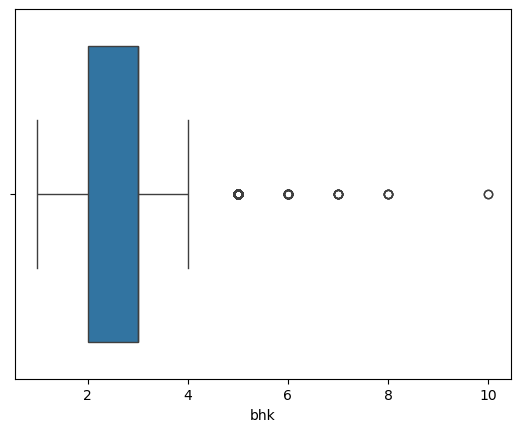

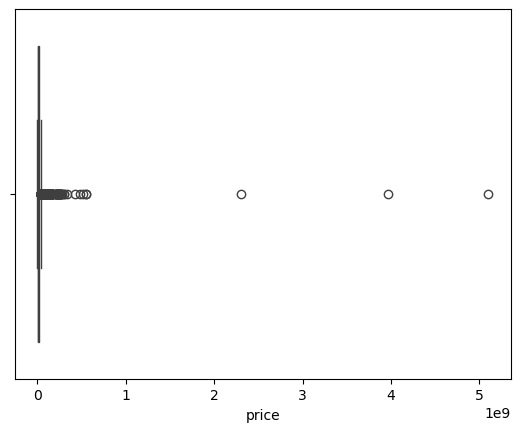

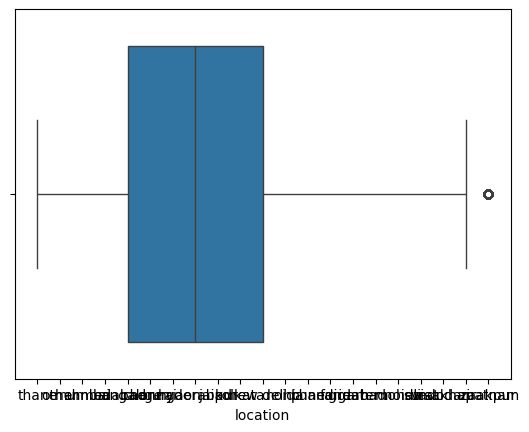

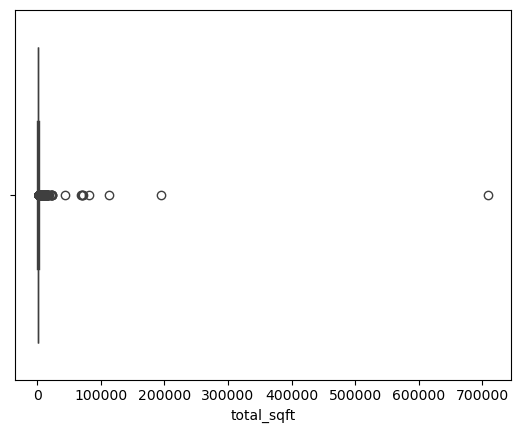

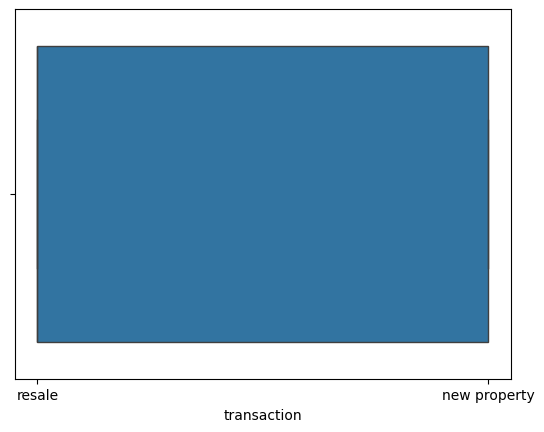

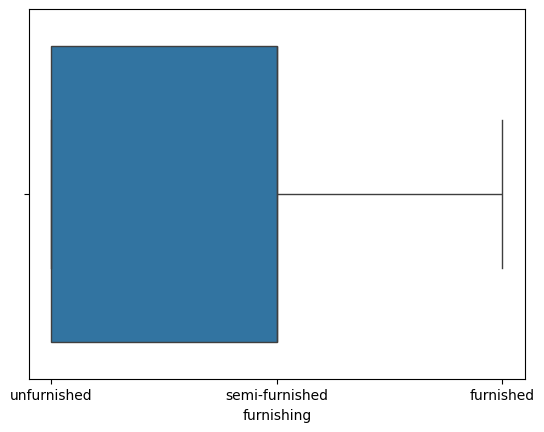

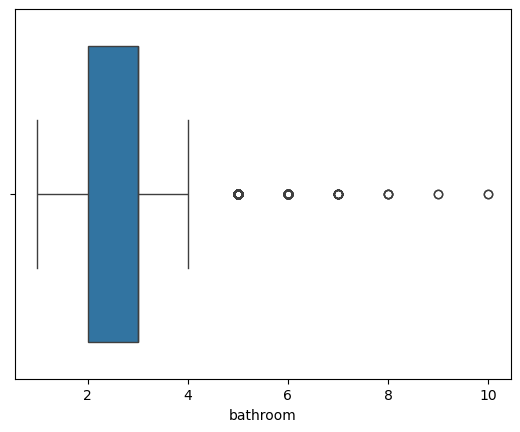

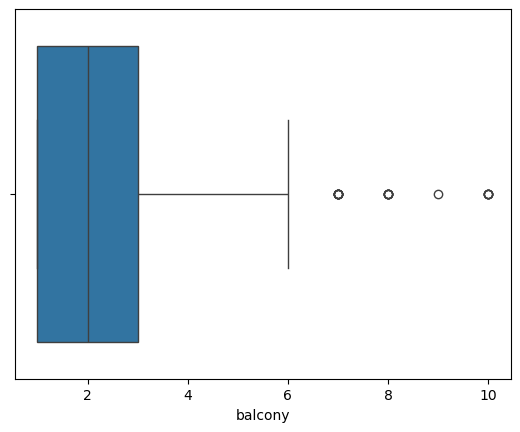

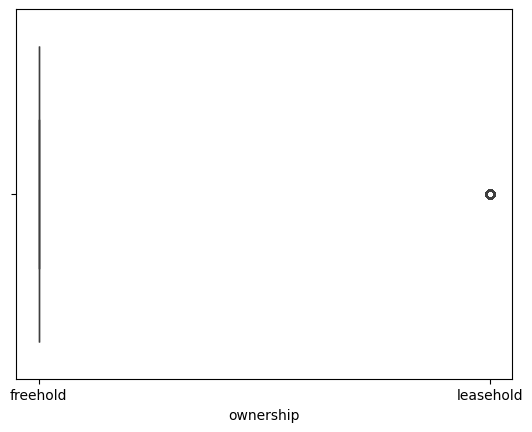

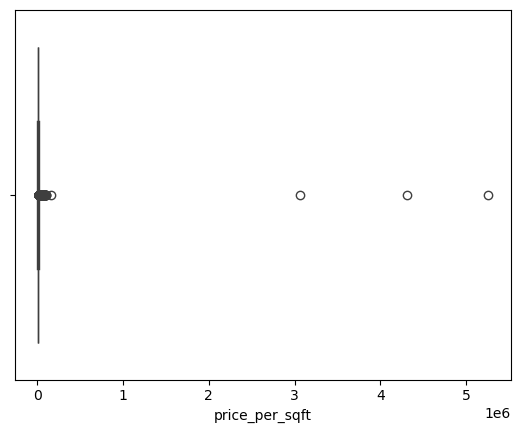

In [97]:
for i in df8.columns:
  sns.boxplot(x=df8[i])
  plt.show()

In [98]:
df8.describe()

,bhk,price,total_sqft,bathroom,balcony,price_per_sqft
count,72048.000000,7.204800e+04,72048.000000,72048.000000,72048.000000,7.204800e+04
mean,2.866436,1.555267e+07,1447.257079,2.733705,2.175314,9.966952e+03
std,0.760998,2.999364e+07,2939.146043,0.868950,0.994220,2.828302e+04
min,1.000000,1.100000e+05,300.000000,1.000000,1.000000,8.459974e+00
25%,2.000000,6.300000e+06,950.000000,2.000000,1.000000,5.811111e+03
50%,3.000000,1.030000e+07,1296.000000,3.000000,2.000000,8.571429e+03
75%,3.000000,1.900000e+07,1630.000000,3.000000,3.000000,1.256983e+04
max,10.000000,5.100400e+09,709222.000000,10.000000,10.000000,5.258144e+06


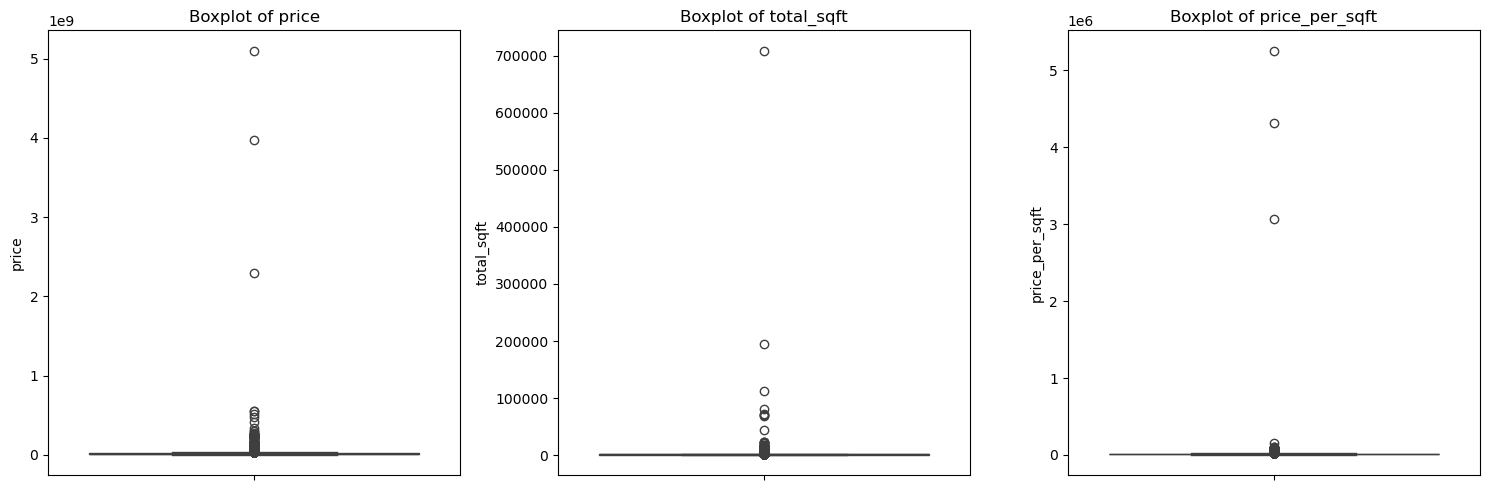

In [99]:
numeric_columns = ["price", "total_sqft", "price_per_sqft"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns, 1):  
    plt.subplot(1, 3, i)
    sns.boxplot(y=df8[col])  
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [100]:
df8.head()

,bhk,price,location,total_sqft,transaction,furnishing,bathroom,balcony,ownership,price_per_sqft
0,3,16000000.0,thane,900.0,resale,unfurnished,3,1,freehold,17777.777778
1,4,42500000.0,thane,1820.0,resale,semi-furnished,4,1,freehold,23351.648352
2,2,9000000.0,thane,675.0,new property,unfurnished,2,1,freehold,13333.333333
3,1,3700000.0,thane,647.0,new property,unfurnished,1,2,freehold,5718.701700
4,2,16500000.0,thane,665.0,resale,unfurnished,2,2,freehold,24812.030075


In [101]:
df8.shape

(72048, 10)

# OUTLIER REMOVAL

In [103]:
def remove_outliers_iqr(df8, columns):
    df9 = df8.copy()
    for col in columns:
        Q1 = df9[col].quantile(0.25)
        Q3 = df9[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df9 = df9[(df9[col] >= lower_bound) & (df9[col] <= upper_bound)]
    return df9

df9 = remove_outliers_iqr(df8, numeric_columns)

In [104]:
df8.shape

(72048, 10)

In [105]:
df9.shape

(64545, 10)

In [106]:
# Checking how many rows were removed
df8.shape[0], df9.shape[0]

(72048, 64545)

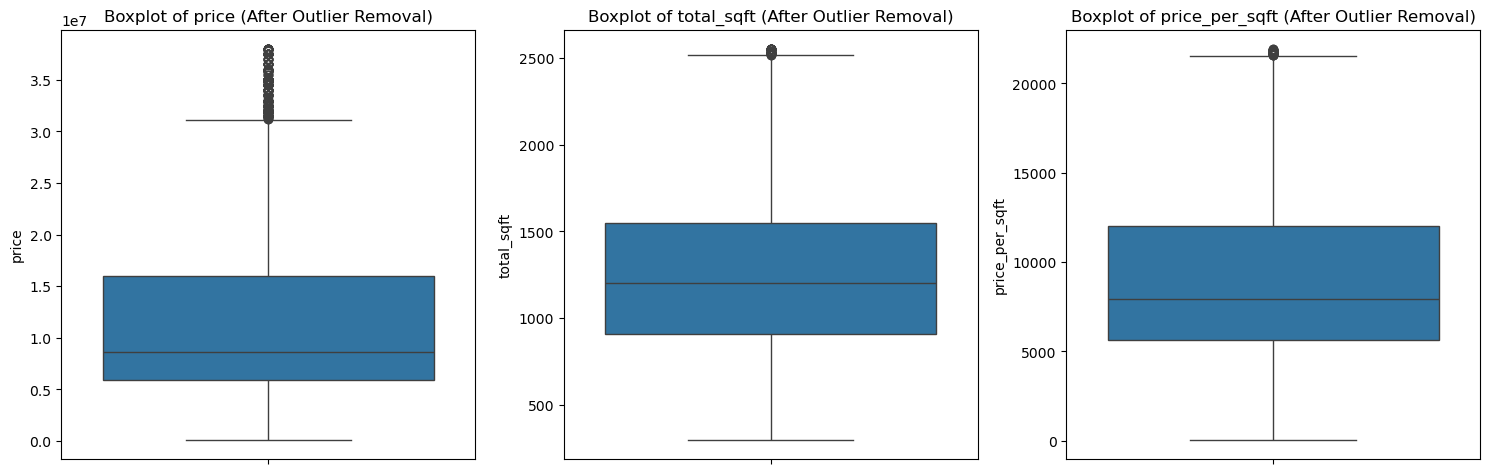

In [107]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(["price", "total_sqft", "price_per_sqft"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df9[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')

plt.tight_layout()
plt.show()


In [108]:
# for i in df9.columns:
#     print(f"Value counts for {i}:\n{df9[i].value_counts()}")    
#     print("XX" * 20)    
#     print(f"Unique values for {i}:\n{df9[i].unique()}")
#     print("\n" + "="*40 + "\n")

In [109]:
# df9.head()

In [110]:
avg_price_per_bhk = df9.groupby('bhk')['price'].mean()
print(avg_price_per_bhk)

bhk
1    3.306386e+06
2    6.563371e+06
3    1.255974e+07
4    2.278836e+07
5    1.829938e+07
6    1.350000e+07
Name: price, dtype: float64


In [111]:
df9[(df9['bhk'] == 1) & (df9['price'] > avg_price_per_bhk[2])]

,bhk,price,location,total_sqft,transaction,furnishing,bathroom,balcony,ownership,price_per_sqft
20,1,7900000.0,thane,460.0,resale,semi-furnished,2,1,freehold,17173.913043
23,1,7700000.0,thane,450.0,resale,unfurnished,2,2,freehold,17111.111111
59,1,7500000.0,thane,435.0,resale,unfurnished,1,3,freehold,17241.379310
86,1,7500000.0,thane,450.0,resale,furnished,1,1,freehold,16666.666667
132,1,6800000.0,thane,475.0,resale,semi-furnished,2,1,freehold,14315.789474
...,...,...,...,...,...,...,...,...,...,...
68777,1,8360000.0,surat,700.0,resale,unfurnished,1,1,freehold,11942.857143
68791,1,8360000.0,surat,475.0,resale,semi-furnished,1,2,freehold,17600.000000
68874,1,8360000.0,surat,500.0,resale,semi-furnished,1,1,freehold,16720.000000
71086,1,9800000.0,visakhapatnam,1325.0,new property,unfurnished,2,1,freehold,7396.226415


In [112]:
df10 = df9.copy()

lets do another outlier removal 

In [114]:
# capping extreme value cases to reduce the impact of outliers

bhk_cap = 5
bathroom_cap = 6
balcony_cap = 7


df10['bhk'] = df10['bhk'].apply(lambda x: min(x, bhk_cap))
df10['bathroom'] = df10['bathroom'].apply(lambda x: min(x, bathroom_cap))
df10['balcony'] = df10['balcony'].apply(lambda x: min(x, balcony_cap))



In [115]:
df10.describe()

,bhk,price,total_sqft,bathroom,balcony,price_per_sqft
count,64545.000000,6.454500e+04,64545.000000,64545.000000,64545.000000,64545.000000
mean,2.758231,1.166654e+07,1254.971942,2.577303,2.170920,8814.605916
std,0.687106,7.460904e+06,416.962689,0.721407,0.980556,3831.074560
min,1.000000,1.100000e+05,300.000000,1.000000,1.000000,62.678063
25%,2.000000,5.920000e+06,908.000000,2.000000,1.000000,5637.583893
50%,3.000000,8.630000e+06,1201.000000,2.000000,2.000000,7950.310559
75%,3.000000,1.600000e+07,1550.000000,3.000000,3.000000,12000.000000
max,5.000000,3.800000e+07,2550.000000,6.000000,7.000000,21919.770774


In [116]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64545 entries, 0 to 72047
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bhk             64545 non-null  int64  
 1   price           64545 non-null  float64
 2   location        64545 non-null  object 
 3   total_sqft      64545 non-null  float64
 4   transaction     64545 non-null  object 
 5   furnishing      64545 non-null  object 
 6   bathroom        64545 non-null  int64  
 7   balcony         64545 non-null  int64  
 8   ownership       64545 non-null  object 
 9   price_per_sqft  64545 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 5.4+ MB


In [117]:
for i in df10.columns:
    print(f"Value counts for {i}:\n{df10[i].value_counts()}")
    
    print("XX" * 20)
    
    print(f"Unique values for {i}:\n{df10[i].unique()}")
    print("\n" + "="*40 + "\n")

Value counts for bhk:
3    35055
2    20302
4     7603
1     1519
5       66
Name: bhk, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Unique values for bhk:
[3 2 1 4 5]


Value counts for price:
17500000.0    2084
8500000.0     1988
7500000.0     1952
26800000.0    1649
6500000.0     1425
              ... 
8430000.0        1
8660000.0        1
1960000.0        1
1660000.0        1
2660000.0        1
Name: price, Length: 1021, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Unique values for price:
[16000000.  9000000.  3700000. ...  8840000.  9260000.  2660000.]


Value counts for location:
new delhi        14297
gurgaon           7606
other             6657
bangalore         5803
ahmedabad         4855
kolkata           4594
hyderabad         3682
chennai           3094
jaipur            2799
faridabad         2400
greater noida     2231
mohali             920
zirakpur           901
chandigarh         808
pune               787
visakhapatnam      757
vadodara           

# VISUALIZATIONS

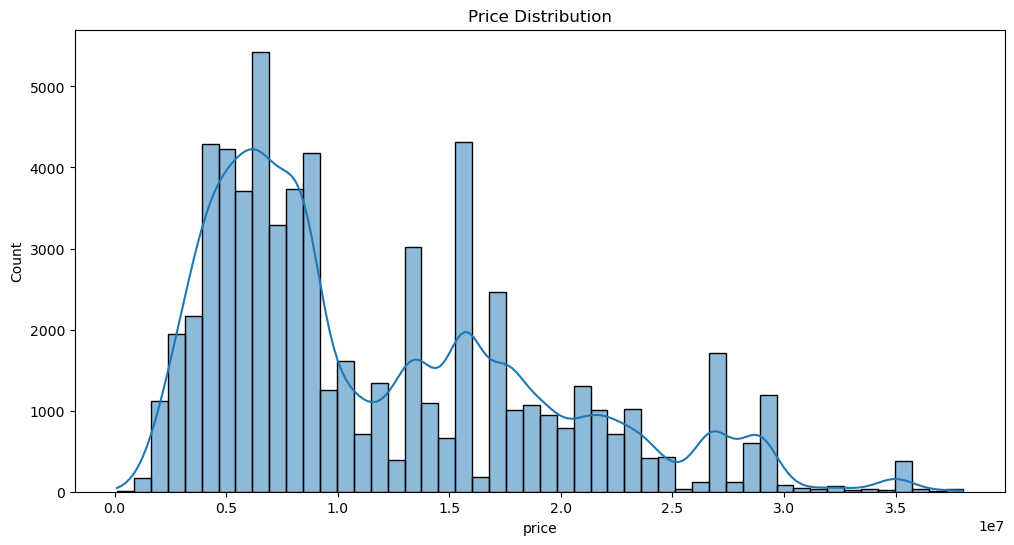

In [119]:
plt.figure(figsize=(12, 6))
sns.histplot(df10['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

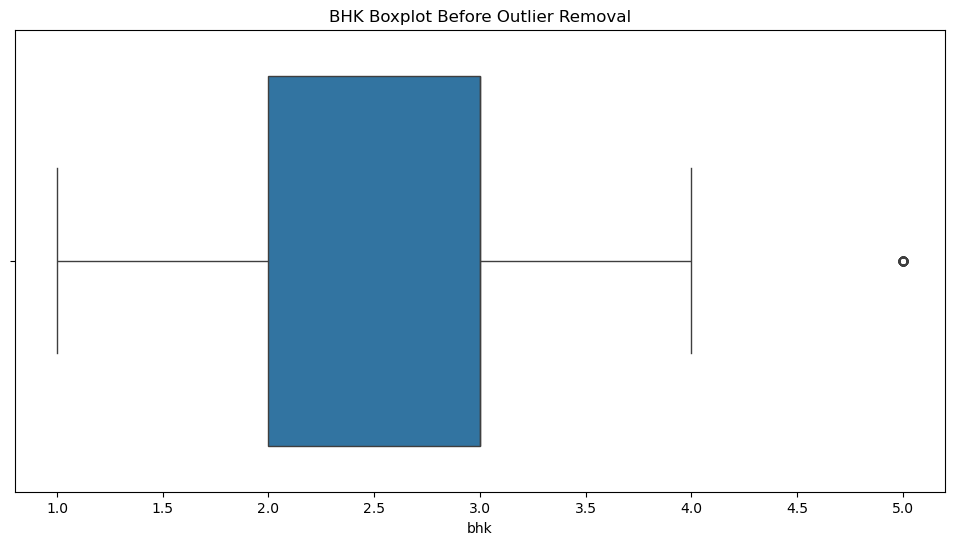

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df10['bhk'])
plt.title("BHK Boxplot Before Outlier Removal")
plt.show()

# check

In [122]:
# Strip any leading or trailing spaces from the 'Ownership' column
df10["ownership"] = df10["ownership"].str.strip()

In [123]:
df10.isna().sum()

bhk               0
price             0
location          0
total_sqft        0
transaction       0
furnishing        0
bathroom          0
balcony           0
ownership         0
price_per_sqft    0
dtype: int64

# ENCODING

In [125]:
df11 = df10.copy()

In [126]:
for i in df11.columns:
    print(f"Value counts for {i}:\n{df11[i].value_counts()}")
    print("XX" * 20)
    print(f"Unique values for {i}:\n{df11[i].unique()}")
    print("\n" + "="*40 + "\n")

Value counts for bhk:
3    35055
2    20302
4     7603
1     1519
5       66
Name: bhk, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Unique values for bhk:
[3 2 1 4 5]


Value counts for price:
17500000.0    2084
8500000.0     1988
7500000.0     1952
26800000.0    1649
6500000.0     1425
              ... 
8430000.0        1
8660000.0        1
1960000.0        1
1660000.0        1
2660000.0        1
Name: price, Length: 1021, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Unique values for price:
[16000000.  9000000.  3700000. ...  8840000.  9260000.  2660000.]


Value counts for location:
new delhi        14297
gurgaon           7606
other             6657
bangalore         5803
ahmedabad         4855
kolkata           4594
hyderabad         3682
chennai           3094
jaipur            2799
faridabad         2400
greater noida     2231
mohali             920
zirakpur           901
chandigarh         808
pune               787
visakhapatnam      757
vadodara           

In [127]:
df11["transaction"].fillna('unknown', inplace=True)

In [128]:
location_ohe = OneHotEncoder(sparse_output=False, dtype=int)
location_ohe.fit(df11[["location"]])  


joblib.dump(location_ohe, 'location_ohe.pkl') 


location = location_ohe.transform(df11[["location"]])
location_df = pd.DataFrame(location, columns=location_ohe.get_feature_names_out(["location"]))

df11 = df11.reset_index(drop=True)
location_df = location_df.reset_index(drop=True)

df11 = pd.concat([df11, location_df], axis=1)
df11.drop(columns=["location"], inplace=True)

In [129]:
transaction_ohe = OneHotEncoder(sparse_output=False,dtype=int)
transaction_ohe.fit(df11[["transaction"]])  


joblib.dump(transaction_ohe, 'transaction_ohe.pkl')

transaction = transaction_ohe.transform(df11[["transaction"]]) 
transaction_df = pd.DataFrame(transaction,columns = transaction_ohe.get_feature_names_out(["transaction"]))

df11=df11.reset_index(drop=True)
transaction_df=transaction_df.reset_index(drop=True)

df11 = pd.concat([df11,transaction_df],axis=1)
df11.drop(columns=["transaction"],inplace = True)

In [130]:
furnishing_label = LabelEncoder()
ownership_label = LabelEncoder()

df11["furnishing"] = furnishing_label.fit_transform(df11["furnishing"])
df11["ownership"] = ownership_label.fit_transform(df11["ownership"])

joblib.dump(furnishing_label, 'furnishing_label_encoder.pkl')
joblib.dump(ownership_label, 'ownership_label_encoder.pkl')

df12 = df11.copy(deep=True)
df12.head()

,bhk,price,total_sqft,furnishing,bathroom,balcony,ownership,price_per_sqft,location_ahmedabad,location_bangalore,location_chandigarh,location_chennai,location_faridabad,location_greater noida,location_gurgaon,location_hyderabad,location_jaipur,location_kolkata,location_mohali,location_mumbai,location_new delhi,location_noida,location_other,location_pune,location_surat,location_thane,location_vadodara,location_visakhapatnam,location_zirakpur,transaction_new property,transaction_resale
0,3,16000000.0,900.0,2,3,1,0,17777.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,9000000.0,675.0,2,2,1,0,13333.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3700000.0,647.0,2,1,2,0,5718.701700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,17500000.0,925.0,0,3,3,0,18918.918919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,4700000.0,434.0,1,1,1,0,10829.493088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [131]:
df12.corr()["price"]

bhk                         0.648052
price                       1.000000
total_sqft                  0.763969
furnishing                 -0.058484
bathroom                    0.620575
balcony                     0.426680
ownership                   0.029463
price_per_sqft              0.856149
location_ahmedabad         -0.052180
location_bangalore         -0.113923
location_chandigarh        -0.047331
location_chennai           -0.051885
location_faridabad         -0.084500
location_greater noida     -0.103806
location_gurgaon            0.377661
location_hyderabad         -0.040952
location_jaipur            -0.157241
location_kolkata           -0.152954
location_mohali            -0.054766
location_mumbai            -0.016079
location_new delhi          0.397815
location_noida             -0.007428
location_other             -0.215592
location_pune              -0.026766
location_surat             -0.051394
location_thane             -0.020742
location_vadodara          -0.087092
l

In [132]:
df12["ownership"].unique()

array([0, 1])

In [133]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64545 entries, 0 to 64544
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bhk                       64545 non-null  int64  
 1   price                     64545 non-null  float64
 2   total_sqft                64545 non-null  float64
 3   furnishing                64545 non-null  int32  
 4   bathroom                  64545 non-null  int64  
 5   balcony                   64545 non-null  int64  
 6   ownership                 64545 non-null  int32  
 7   price_per_sqft            64545 non-null  float64
 8   location_ahmedabad        64545 non-null  int32  
 9   location_bangalore        64545 non-null  int32  
 10  location_chandigarh       64545 non-null  int32  
 11  location_chennai          64545 non-null  int32  
 12  location_faridabad        64545 non-null  int32  
 13  location_greater noida    64545 non-null  int32  
 14  locati

In [134]:
df12.isna().sum()

bhk                         0
price                       0
total_sqft                  0
furnishing                  0
bathroom                    0
balcony                     0
ownership                   0
price_per_sqft              0
location_ahmedabad          0
location_bangalore          0
location_chandigarh         0
location_chennai            0
location_faridabad          0
location_greater noida      0
location_gurgaon            0
location_hyderabad          0
location_jaipur             0
location_kolkata            0
location_mohali             0
location_mumbai             0
location_new delhi          0
location_noida              0
location_other              0
location_pune               0
location_surat              0
location_thane              0
location_vadodara           0
location_visakhapatnam      0
location_zirakpur           0
transaction_new property    0
transaction_resale          0
dtype: int64

In [135]:
df12.shape

(64545, 31)

In [136]:
df12.head()

,bhk,price,total_sqft,furnishing,bathroom,balcony,ownership,price_per_sqft,location_ahmedabad,location_bangalore,location_chandigarh,location_chennai,location_faridabad,location_greater noida,location_gurgaon,location_hyderabad,location_jaipur,location_kolkata,location_mohali,location_mumbai,location_new delhi,location_noida,location_other,location_pune,location_surat,location_thane,location_vadodara,location_visakhapatnam,location_zirakpur,transaction_new property,transaction_resale
0,3,16000000.0,900.0,2,3,1,0,17777.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,9000000.0,675.0,2,2,1,0,13333.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3700000.0,647.0,2,1,2,0,5718.701700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,17500000.0,925.0,0,3,3,0,18918.918919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,4700000.0,434.0,1,1,1,0,10829.493088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# X, Y split

In [138]:
X = df12.drop(["price","price_per_sqft"],axis=1)

In [139]:
X.head()

,bhk,total_sqft,furnishing,bathroom,balcony,ownership,location_ahmedabad,location_bangalore,location_chandigarh,location_chennai,location_faridabad,location_greater noida,location_gurgaon,location_hyderabad,location_jaipur,location_kolkata,location_mohali,location_mumbai,location_new delhi,location_noida,location_other,location_pune,location_surat,location_thane,location_vadodara,location_visakhapatnam,location_zirakpur,transaction_new property,transaction_resale
0,3,900.0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,675.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,647.0,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,925.0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,434.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [140]:
df12["price_log"] = np.log1p(df12["price"]) #handle extreme values when right skewed occurs (mean>median in target variable)

In [141]:
df12.head()

,bhk,price,total_sqft,furnishing,bathroom,balcony,ownership,price_per_sqft,location_ahmedabad,location_bangalore,location_chandigarh,location_chennai,location_faridabad,location_greater noida,location_gurgaon,location_hyderabad,location_jaipur,location_kolkata,location_mohali,location_mumbai,location_new delhi,location_noida,location_other,location_pune,location_surat,location_thane,location_vadodara,location_visakhapatnam,location_zirakpur,transaction_new property,transaction_resale,price_log
0,3,16000000.0,900.0,2,3,1,0,17777.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,16.588099
1,2,9000000.0,675.0,2,2,1,0,13333.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,16.012735
2,1,3700000.0,647.0,2,1,2,0,5718.701700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,15.123844
3,3,17500000.0,925.0,0,3,3,0,18918.918919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,16.677711
4,1,4700000.0,434.0,1,1,1,0,10829.493088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,15.363073


In [142]:
y = df12["price_log"]

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation

In [145]:
# Function for evaluation

def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}\n")

In [146]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    evaluate_model(model, X_test_scaled, y_test)


Training Linear Regression...
Mean Absolute Error (MAE): 0.2494792278722683
Mean Squared Error (MSE): 0.10200515408286685
Root Mean Squared Error (RMSE): 0.31938245738122006
R² Score: 0.7690512565713528

Training Ridge Regression...
Mean Absolute Error (MAE): 0.249479274611356
Mean Squared Error (MSE): 0.10200505304612736
Root Mean Squared Error (RMSE): 0.3193822992060258
R² Score: 0.7690514853275194

Training Random Forest...
Mean Absolute Error (MAE): 0.09906367866495064
Mean Squared Error (MSE): 0.04662874177984848
Root Mean Squared Error (RMSE): 0.21593689304944738
R² Score: 0.8944283804231453

Training XGBoost...
Mean Absolute Error (MAE): 0.12718920525199898
Mean Squared Error (MSE): 0.049485440613594917
Root Mean Squared Error (RMSE): 0.22245323241885004
R² Score: 0.8879605601258311

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory i

C:\Users\pessh\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Mean Absolute Error (MAE): 0.1263404145627947
Mean Squared Error (MSE): 0.04944615338597985
Root Mean Squared Error (RMSE): 0.22236491041974193
R² Score: 0.8880495099042229



C:\Users\pessh\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [148]:
# Initialize Random Forest with regularization to reduce overfitting
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=10, 
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Function for evaluation
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    print(f"{dataset_name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R² Score: {r2}\n")
    return y, y_pred, r2

# Evaluate on Train & Test sets
y_train_actual, y_train_pred, r2_train = evaluate_model(rf_model, X_train_scaled, y_train, "Train Set")
y_test_actual, y_test_pred, r2_test = evaluate_model(rf_model, X_test_scaled, y_test, "Test Set")

# Check for overfitting
if r2_train - r2_test > 0.1:
    print("Warning: Model may be overfitting! Consider tuning hyperparameters.")
else:
    print("Model generalizes well.")


Train Set Performance:
MAE: 0.12816535065753726
MSE: 0.055264749592343974
RMSE: 0.23508455838770861
R² Score: 0.8757251517692157

Test Set Performance:
MAE: 0.13400797193517963
MSE: 0.059612972458762875
RMSE: 0.24415767949987335
R² Score: 0.8650309270626327

Model generalizes well.


In [149]:
# Save Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')  
# Save scaler
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [150]:
print("Scaler expects:", scaler.feature_names_in_)

Scaler expects: ['bhk' 'total_sqft' 'furnishing' 'bathroom' 'balcony' 'ownership'
 'location_ahmedabad' 'location_bangalore' 'location_chandigarh'
 'location_chennai' 'location_faridabad' 'location_greater noida'
 'location_gurgaon' 'location_hyderabad' 'location_jaipur'
 'location_kolkata' 'location_mohali' 'location_mumbai'
 'location_new delhi' 'location_noida' 'location_other' 'location_pune'
 'location_surat' 'location_thane' 'location_vadodara'
 'location_visakhapatnam' 'location_zirakpur' 'transaction_new property'
 'transaction_resale']


In [151]:
print("Model was trained on:", model.feature_names_in_)

Model was trained on: ['Column_0' 'Column_1' 'Column_2' 'Column_3' 'Column_4' 'Column_5'
 'Column_6' 'Column_7' 'Column_8' 'Column_9' 'Column_10' 'Column_11'
 'Column_12' 'Column_13' 'Column_14' 'Column_15' 'Column_16' 'Column_17'
 'Column_18' 'Column_19' 'Column_20' 'Column_21' 'Column_22' 'Column_23'
 'Column_24' 'Column_25' 'Column_26' 'Column_27' 'Column_28']


In [152]:
print(model.feature_importances_)


[ 147 1082  169  137  290   72   34   68   20   37   54   52   63   19
   63   48   33   22   80   17   85   52   16   56   52   36   42    0
  154]


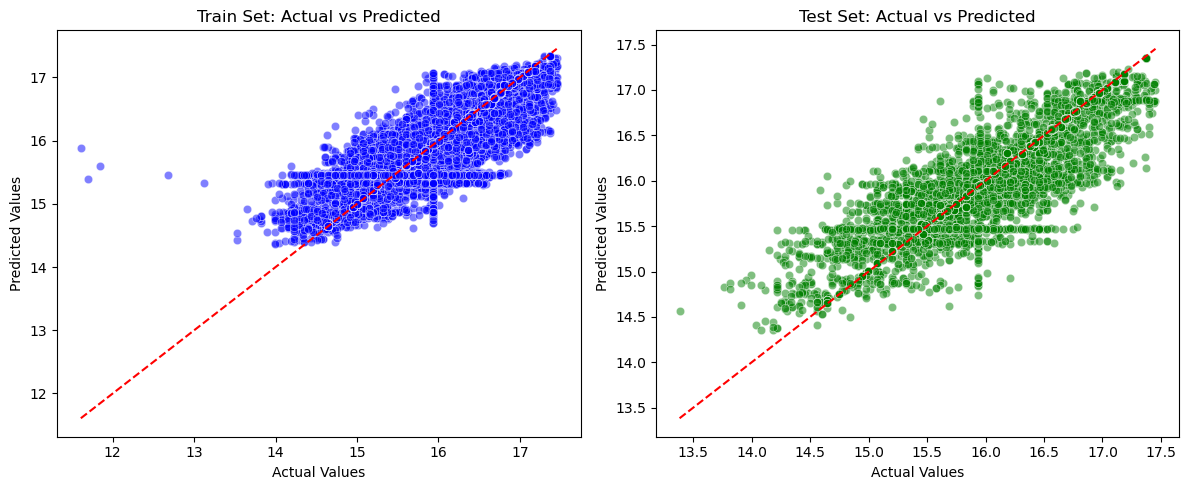

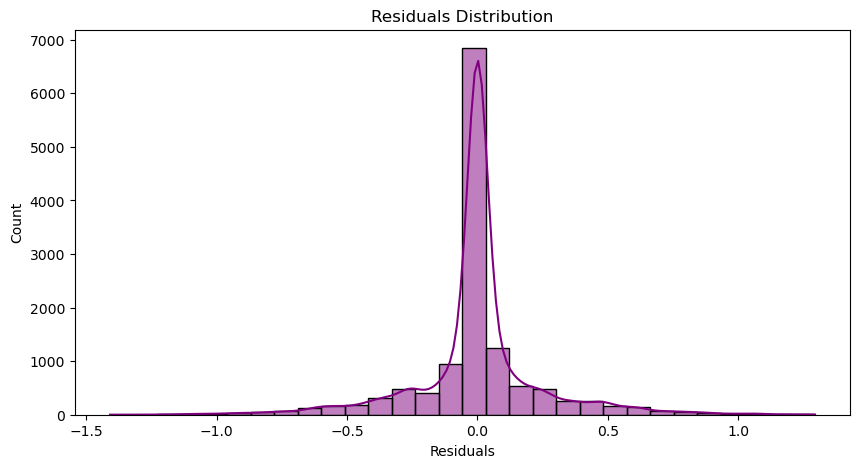

In [153]:
# Visualization - Actual vs Predicted
plt.figure(figsize=(12, 5))

# Train vs Test Predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_actual, y=y_train_pred, alpha=0.5, color='blue')
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Train Set: Actual vs Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_actual, y=y_test_pred, alpha=0.5, color='green')
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()

# Residuals Plot
plt.figure(figsize=(10, 5))
sns.histplot(y_test_actual - y_test_pred, bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()


# END OF THE NOTEBOOK